In [15]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
cd drive/My Drive/algorithmtrading/pair_trading

[Errno 2] No such file or directory: 'drive/My Drive/algorithmtrading/pair_trading'
/content/drive/My Drive/algorithmtrading/pair_trading/bidask


In [ ]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin-1:end]

# 1. 과거 1분단위 데이터 받아오기

In [ ]:
now = '20210120'

samsung_group = pd.read_pickle('KODEX 200(m)_'+now)
samsung_value = pd.read_pickle('TIGER 200(m)_'+now)

temp =  pd.merge(left = samsung_group , right = samsung_value, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')
temp.columns = ['samsung_group','volume','samsung_value','volume']
temp = temp[['samsung_group','samsung_value']]

temp['samsung_group']=pd.to_numeric(temp['samsung_group'])
temp['samsung_value']=pd.to_numeric(temp['samsung_value'])

for i in range(len(temp)):
    if temp['samsung_group'].iloc[i] < 0:
        temp['samsung_group'].iloc[i] = -temp['samsung_group'].iloc[i]
    if temp['samsung_value'].iloc[i] < 0:
        temp['samsung_value'].iloc[i] = -temp['samsung_value'].iloc[i]


temp['samsung_value'] = temp['samsung_value']
temp['spread'] = temp['samsung_group'] - temp['samsung_value']
temp['samsung_group_cumret'] = np.log(temp['samsung_group']/temp['samsung_group'][0])
temp['samsung_value_cumret'] = np.log(temp['samsung_value']/temp['samsung_value'][0])
temp['ma10_spread'] = temp['spread'].rolling(window=10, center=False).mean()

temp

,kodex200,tiger200,spread,kodex200_cumret,tiger200_cumret,ma10_spread
체결시간,,,,,,
20200102100000,29221,29176,45,0.000000,0.000000,nan
20200102100100,29192,29152,40,-0.000993,-0.000823,nan
20200102100200,29206,29166,40,-0.000513,-0.000343,nan
20200102100300,29192,29152,40,-0.000993,-0.000823,nan
20200102100400,29152,29112,40,-0.002364,-0.002196,nan
...,...,...,...,...,...,...
20210119151600,42700,42660,40,0.379311,0.379915,25.000000
20210119151700,42700,42675,25,0.379311,0.380267,25.000000
20210119151800,42720,42690,30,0.379780,0.380618,27.000000


# 2. 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [ ]:
df = {}
calender = []
for date in range(20201021,20210120):
    if 20201231 < date < 20210100:
        continue
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        temps['samsung_group_dayret'] = np.log(temps['samsung_group']/temps['samsung_group'][0])
        temps['samsung_value_dayret'] = np.log(temps['samsung_value']/temps['samsung_value'][0])
        temps['spread_cumret'] = temps['samsung_group_cumret'] -temps['samsung_value_cumret']
        temps['spread_dayret']= temps['samsung_group_dayret'] - temps['samsung_value_dayret'] 
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))
    except:
        pass
calender

# 3. 그래프 그리기

In [ ]:
for date in calender[-10:]:
    plt.rcParams["figure.figsize"] = (20, 10)
    df[date]['spread'].plot()
    # df[date]['ma10_spread'].plot()
    # temp_high = df[date]['ma10_spread'] +20
    # temp_low = df[date]['ma10_spread']-20
    # temp_high.plot(linestyle='--')
    # temp_low.plot(linestyle='--')
    # df[date]['samsung_group'].plot()
    # df[date]['samsung_value'].plot()
    # plt.axhline((0.0003), color='red', linestyle='--')
    # plt.axhline((-0.0003), color='red', linestyle='--')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (30, 10)
# temp['samsung_group_cumret'].plot()
# temp['samsung_group_cumret'].plot()
# temp['samsung_value_cumret'].plot()
temp['samsung_group'].plot()
temp['samsung_value'].plot()
# temp['ma30'].plot()

# 4. 스프레드 확인

In [17]:
cd bidask

[Errno 2] No such file or directory: 'bidask'
/content/drive/My Drive/algorithmtrading/pair_trading/bidask


In [18]:
now = '20210122'

samsung_group_bidask = pd.read_pickle('KODEX 삼성그룹_'+now)
samsung_value_bidask = pd.read_pickle('KODEX 삼성그룹밸류_'+now)

bidask =  pd.merge(left = samsung_group_bidask , right = samsung_value_bidask, how = "inner", on = "time")
bidask.columns = ['samsung_group_bid','samsung_group_ask','samsung_value_bid','samsung_value_ask']
samsung_group_ask = bidask['samsung_group_ask']
samsung_group_bid = bidask['samsung_group_bid']
samsung_value_ask = bidask['samsung_value_ask']
samsung_value_bid = bidask['samsung_value_bid']
bidask

,samsung_group_bid,samsung_group_ask,samsung_value_bid,samsung_value_ask
time,,,,
095244,10800,10790,9890,9855
095246,10800,10790,9890,9855
095249,10790,10785,9885,9855
095252,10795,10785,9885,9850
095254,10795,10785,9885,9850
...,...,...,...,...
151952,10850,10840,9875,9840
151954,10850,10845,9875,9840
151957,10850,10845,9875,9840


## - bidask 스프레드

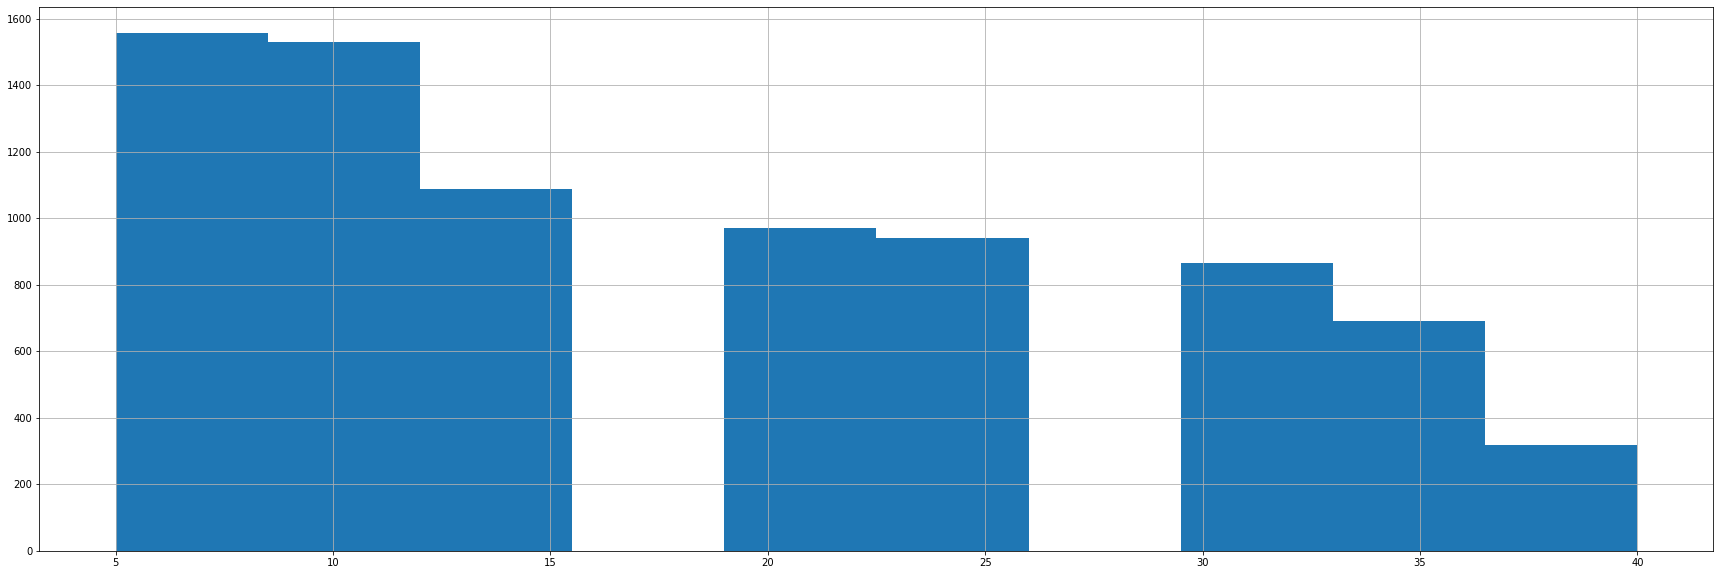

In [20]:
plt.rcParams["figure.figsize"] = (30, 10)
bidask_spread = samsung_value_bid-samsung_value_ask
bidask_spread.hist()

# samsung_value_ask_samsung_group_bid spread freaquency    (청산포지션)

-950     800
-1010    655
-1000    545
-945     485
-1005    476
-1015    472
-995     443
-955     433
-965     391
-1025    386
-1020    379
-970     323
-1040    300
-990     296
-1045    295
-1035    246
-960     235
-1030    209
-975     192
-940     103
-1050     90
-985      90
-935      48
-1055     30
-980      29
-930       9
-925       1
dtype: int64


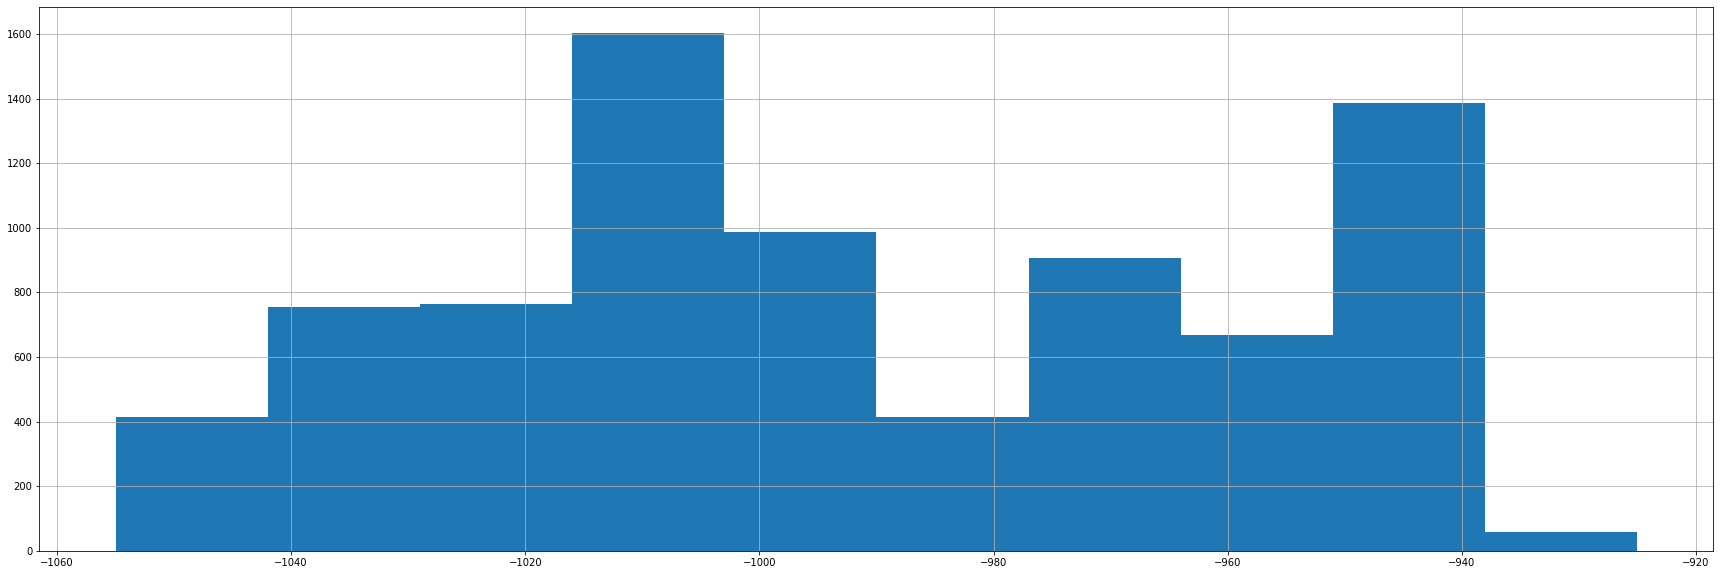

In [21]:
finish = samsung_value_ask - samsung_group_bid
finish.hist()
freq = finish.value_counts() 
print(freq)

# samsung_group_ask_samsung_value_bid spread freaquency (포지션시작)

995     603
1000    549
985     498
915     467
980     458
990     421
925     365
1005    347
1010    347
920     344
905     342
975     315
930     313
940     266
1015    261
910     246
935     244
1020    220
945     215
1025    196
965     178
900     170
950     148
1030    139
970     111
960     107
955      73
1035     18
dtype: int64


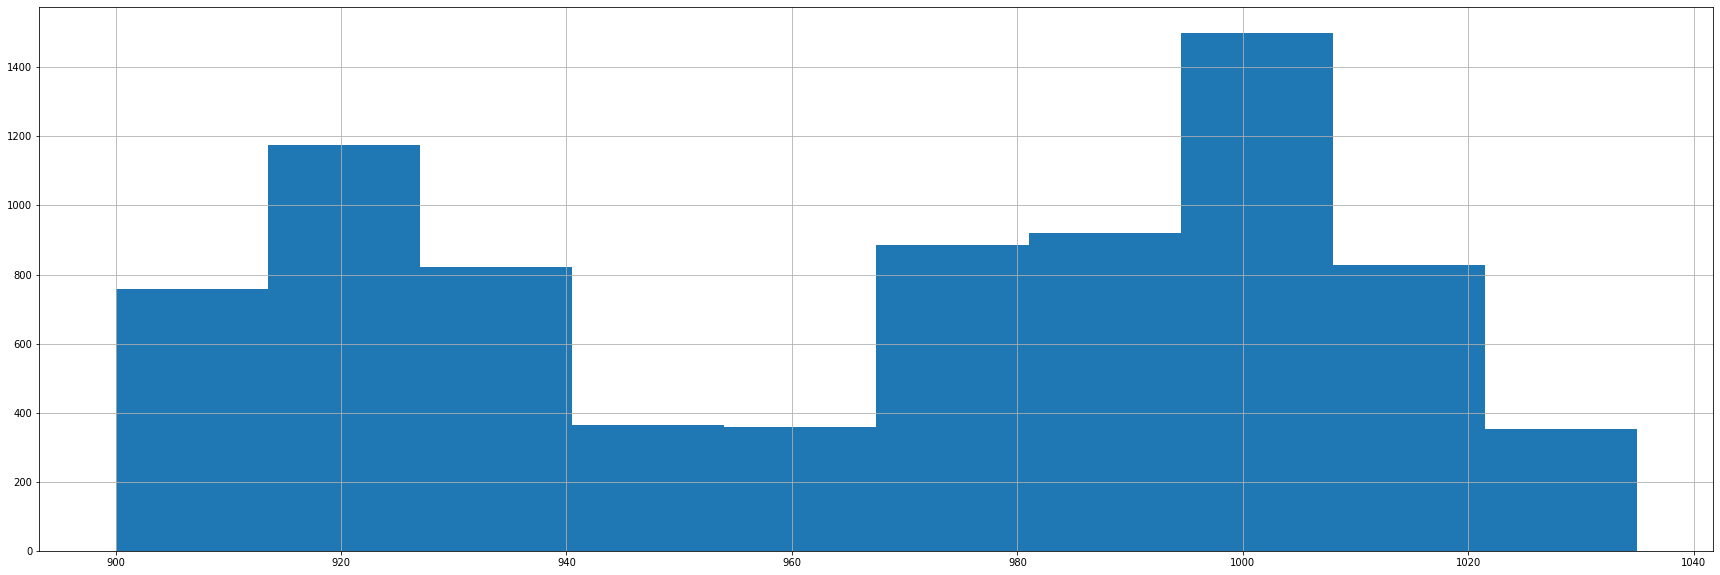

In [22]:
start = samsung_group_ask - samsung_value_bid
start.hist()
freq = start.value_counts() 
print(freq)

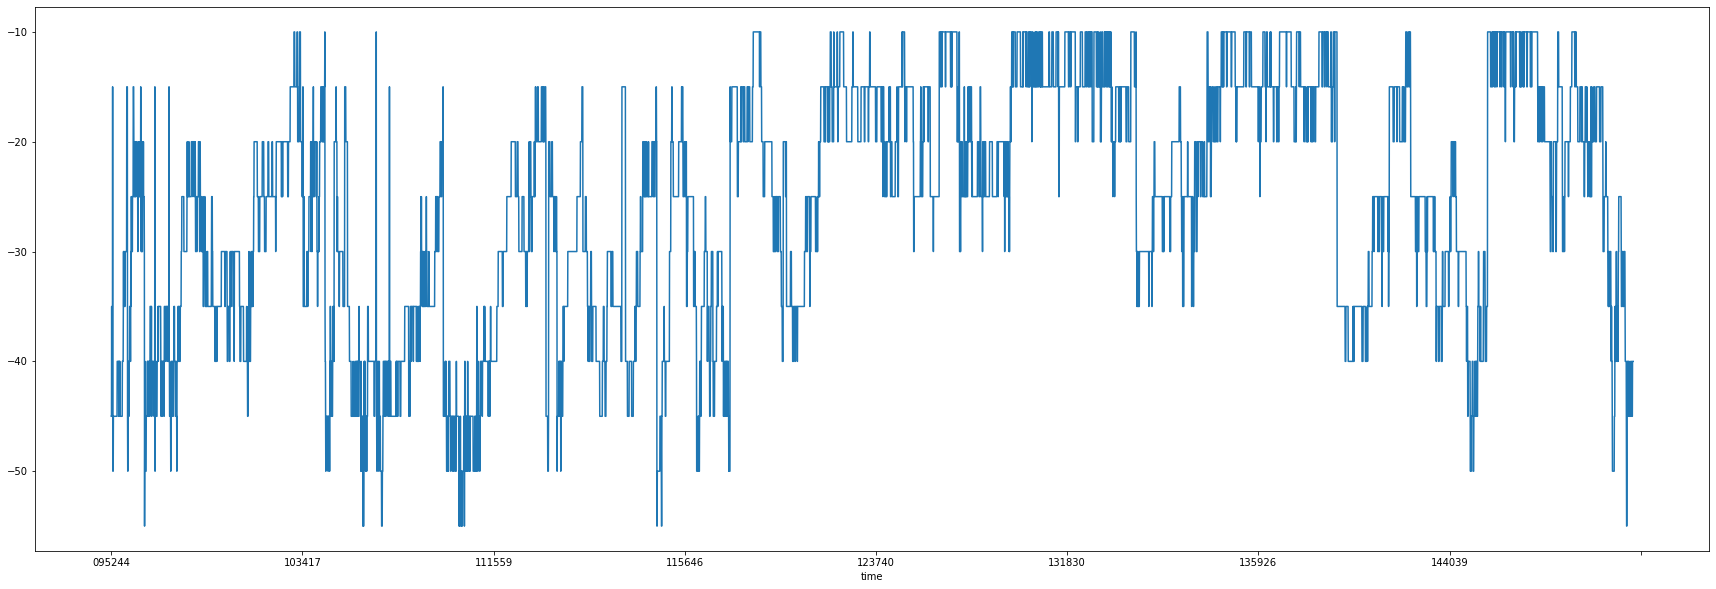

In [ ]:
(finish+start).plot()

# 시뮬레이션

In [ ]:
profit = 0
profits = {}

samsung_group = 20
samsung_value = 20

lev = 1

spread_start = list(map(int,start.index[:10]))
spread_finish = list(map(int,finish.index[:10]))

for j in spread_start:
    for k in spread_finish:
        if j + k < 0:
            continue
        profit = 0
        t = 0
        for i in range(len(bidask)):
            if bidask['samsung_group_ask'].iloc[i] - bidask['samsung_value_bid'].iloc[i] >= j and samsung_value<=39:
                samsung_group -= lev
                samsung_value += lev
                profit += bidask['samsung_group_ask'].iloc[i]*lev - bidask['samsung_value_bid'].iloc[i]*lev
                print('start',i,'번째거래 / ','  ask:',bidask['samsung_group_ask'].iloc[i],'  bid:', bidask['samsung_value_bid'].iloc[i],'  profit:',profit)
                t += 2
                continue
            if bidask['samsung_value_ask'].iloc[i] - bidask['samsung_group_bid'].iloc[i] >= k and samsung_value > 20:
                profit += bidask['samsung_value_ask'].iloc[i]*(samsung_value - 20) - bidask['samsung_group_bid'].iloc[i]*(samsung_value-20)
                samsung_value = 20
                samsung_group = 20
                print('finish',i,'번째거래 / ','  ask:',bidask['samsung_value_ask'].iloc[i],'  bid:', bidask['samsung_group_bid'].iloc[i],'  profit:',profit)       
                t += 2
        profits[(j,k,t)] = profit - t*6
        print('-------------------------------------------------------------------------------------------------------------------')

profits

In [43]:
j = 1000 ; k = -940

profit = 0
t = 0
samsung_group = 20
samsung_value = 20

lev = 1

check = None

for i in range(len(bidask)):

    
    if bidask['samsung_group_ask'].iloc[i] - bidask['samsung_value_bid'].iloc[i] >= j and 20 <= samsung_value<=39 :
        samsung_group -= lev
        samsung_value += lev
        profit += bidask['samsung_group_ask'].iloc[i]*lev - bidask['samsung_value_bid'].iloc[i]*lev
        print('shortstart',i,'번째거래 / ','  ask:',bidask['samsung_group_ask'].iloc[i],'  bid:', bidask['samsung_value_bid'].iloc[i],'  profit:',profit)
        check = 'short'
        continue
    if bidask['samsung_value_ask'].iloc[i] - bidask['samsung_group_bid'].iloc[i] >= k and check == 'short':
        profit += bidask['samsung_value_ask'].iloc[i]*(samsung_value - 20) - bidask['samsung_group_bid'].iloc[i]*(samsung_value-20)
        samsung_value = 20
        samsung_group = 20
        print('shortfinish',i,'번째거래 / ','  ask:',bidask['samsung_value_ask'].iloc[i],'  bid:', bidask['samsung_group_bid'].iloc[i],'  profit:',profit)       
        t += 2


    if bidask['samsung_value_ask'].iloc[i] - bidask['samsung_group_bid'].iloc[i] >= k and  20 <=samsung_group <= 39:
        samsung_group += lev
        samsung_value -= lev
        profit += bidask['samsung_value_ask'].iloc[i]*lev - bidask['samsung_group_bid'].iloc[i]*lev
        print('longstart',i,'번째거래 / ','  ask:',bidask['samsung_value_ask'].iloc[i],'  bid:', bidask['samsung_group_bid'].iloc[i],'  profit:',profit)       
        check = 'long'
        continue
    if bidask['samsung_group_ask'].iloc[i] - bidask['samsung_value_bid'].iloc[i] >= j and samsung_group > 20 and check == 'long':
        profit += bidask['samsung_group_ask'].iloc[i]*(samsung_group - 20) - bidask['samsung_value_bid'].iloc[i]*(samsung_group-20)
        samsung_value = 20
        samsung_group = 20
        print('longfinish',i,'번째거래 / ','  ask:',bidask['samsung_group_ask'].iloc[i],'  bid:', bidask['samsung_value_bid'].iloc[i],'  profit:',profit)
        t += 2


if check == 'short':
    profit += bidask['samsung_value_ask'].iloc[-1]*(samsung_value - 20) - bidask['samsung_group_bid'].iloc[-1]*(samsung_value-20)
if check == 'long':
    profit += bidask['samsung_group_ask'].iloc[-1]*(samsung_group - 20) - bidask['samsung_value_bid'].iloc[-1]*(samsung_group-20)     
print(profit)
print('-------------------------------------------------------------------------------------------------------------------')

longstart 2 번째거래 /    ask: 9855   bid: 10790   profit: -935
longstart 64 번째거래 /    ask: 9850   bid: 10790   profit: -1875
longstart 66 번째거래 /    ask: 9850   bid: 10790   profit: -2815
longstart 67 번째거래 /    ask: 9850   bid: 10790   profit: -3755
longstart 68 번째거래 /    ask: 9850   bid: 10790   profit: -4695
longstart 69 번째거래 /    ask: 9850   bid: 10790   profit: -5635
longstart 70 번째거래 /    ask: 9850   bid: 10790   profit: -6575
longstart 71 번째거래 /    ask: 9850   bid: 10790   profit: -7515
longstart 72 번째거래 /    ask: 9850   bid: 10790   profit: -8455
longstart 73 번째거래 /    ask: 9850   bid: 10790   profit: -9395
longstart 74 번째거래 /    ask: 9850   bid: 10785   profit: -10330
longstart 75 번째거래 /    ask: 9850   bid: 10785   profit: -11265
longstart 76 번째거래 /    ask: 9850   bid: 10785   profit: -12200
longstart 77 번째거래 /    ask: 9850   bid: 10785   profit: -13135
longstart 78 번째거래 /    ask: 9850   bid: 10785   profit: -14070
longstart 79 번째거래 /    ask: 9850   bid: 10785   profit: -15005
long